In [113]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
from bs4 import BeautifulSoup
import tqdm
import tiktoken
import numpy as np

In [95]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.encoding_for_model(encoding_name)
    num_tokens = len(encoding.encode(string, disallowed_special=()))
    return num_tokens

In [45]:
pd.set_option('display.max_colwidth', 5000)

In [46]:
ls data

ai.stackexchange.com/             economics.stackexchange.com/
astronomy.stackexchange.com/      fitness.stackexchange.com/
bicycles.stackexchange.com/       genai.stackexchange.com/
bioinformatics.stackexchange.com/ movies.stackexchange.com/
chess.stackexchange.com/          pets.stackexchange.com/
coffee.stackexchange.com/         politics.stackexchange.com/
datascience.stackexchange.com/    travel.stackexchange.com/


In [35]:
! ls data/ai.stackexchange.com

Posts.xml


In [60]:
def get_text_from_html(text):
    if text is None:
        return None
    soup = BeautifulSoup(text)
    return soup.get_text()

def process_folder(folder_name):
    with open('data/%s/Posts.xml' % folder_name) as f:
        xml_data = f.read()
    
    root = ET.fromstring(xml_data)
    post_items = root.findall('row')
    print('Total number of posts: %d' % len(post_items))
    tmp_data = []
    for item in post_items:
        tmp_data.append(
            {
                'topic': folder_name.replace('.stackexchange.com', ''),
                'raw_body': item.get('Body'),
                'raw_title': item.get('Title'),
                'body': get_text_from_html(item.get('Body')),
                'title': get_text_from_html(item.get('Title')),
                'tags': item.get('Tags'),
                'post_type': item.get('PostTypeId')
            }
        )
    df = pd.DataFrame(tmp_data)
    df = df[df.post_type == '1']
    print('Number of questions: %d' % len(df))
    return df

In [61]:
tmp_df = process_folder('ai.stackexchange.com')

Total number of posts: 25956


/var/folders/7v/1ln722x97kd8bchgxpmdkynw0000gn/T/ipykernel_75214/2580885949.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text)


Number of questions: 12020


In [67]:
tmp_dfs = []

for folder_name in tqdm.tqdm(os.listdir('./data')):
    if folder_name.startswith('.'):
        print('Skipping %s...' % folder_name)
        continue
    print(folder_name)
    tmp_dfs.append(process_folder(folder_name))

  0%|                                                                               | 0/15 [00:00<?, ?it/s]

ai.stackexchange.com
Total number of posts: 25956


/var/folders/7v/1ln722x97kd8bchgxpmdkynw0000gn/T/ipykernel_75214/2580885949.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text)
  7%|████▋                                                                  | 1/15 [00:05<01:18,  5.61s/it]

Number of questions: 12020
coffee.stackexchange.com
Total number of posts: 4483


 13%|█████████▍                                                             | 2/15 [00:06<00:34,  2.64s/it]

Number of questions: 1458
astronomy.stackexchange.com
Total number of posts: 35084


 20%|██████████████▏                                                        | 3/15 [00:12<00:53,  4.48s/it]

Number of questions: 14339
Skipping .DS_Store...
pets.stackexchange.com
Total number of posts: 21159


 33%|███████████████████████▋                                               | 5/15 [00:15<00:27,  2.78s/it]

Number of questions: 8267
politics.stackexchange.com
Total number of posts: 55308


 40%|████████████████████████████▍                                          | 6/15 [00:28<00:50,  5.57s/it]

Number of questions: 16518
bioinformatics.stackexchange.com
Total number of posts: 13775


 47%|█████████████████████████████████▏                                     | 7/15 [00:31<00:38,  4.78s/it]

Number of questions: 5923
genai.stackexchange.com
Total number of posts: 474
Number of questions: 181
bicycles.stackexchange.com
Total number of posts: 69574


 60%|██████████████████████████████████████████▌                            | 9/15 [00:40<00:28,  4.74s/it]

Number of questions: 20582
travel.stackexchange.com
Total number of posts: 128164


 67%|██████████████████████████████████████████████▋                       | 10/15 [00:58<00:39,  7.99s/it]

Number of questions: 48040
fitness.stackexchange.com
Total number of posts: 29505


 73%|███████████████████████████████████████████████████▎                  | 11/15 [01:03<00:28,  7.10s/it]

Number of questions: 10126
chess.stackexchange.com
Total number of posts: 30452


 80%|████████████████████████████████████████████████████████              | 12/15 [01:07<00:19,  6.42s/it]

Number of questions: 8744
economics.stackexchange.com
Total number of posts: 34095


 87%|████████████████████████████████████████████████████████████▋         | 13/15 [01:14<00:13,  6.62s/it]

Number of questions: 15489
datascience.stackexchange.com
Total number of posts: 78220


 93%|█████████████████████████████████████████████████████████████████▎    | 14/15 [01:29<00:08,  8.89s/it]

Number of questions: 36604
movies.stackexchange.com
Total number of posts: 64473


100%|██████████████████████████████████████████████████████████████████████| 15/15 [01:40<00:00,  6.68s/it]

Number of questions: 22730


In [68]:
df = pd.concat(tmp_dfs)

In [70]:
df.topic.value_counts()

topic
travel            48040
datascience       36604
movies            22730
bicycles          20582
politics          16518
economics         15489
astronomy         14339
ai                12020
fitness           10126
chess              8744
pets               8267
bioinformatics     5923
coffee             1458
genai               181
Name: count, dtype: int64

In [108]:
print('a\nb')

a
b


In [109]:
df['full_text'] = list(map(
    lambda x, y: x + '\n' + y,
    df.title,
    df.body
))

In [110]:
df['tokens'] = df.full_text.map(lambda x: num_tokens_from_string(x, 'gpt-4-1106-preview'))

Text(0.5, 1.0, 'Distribution of tokens')

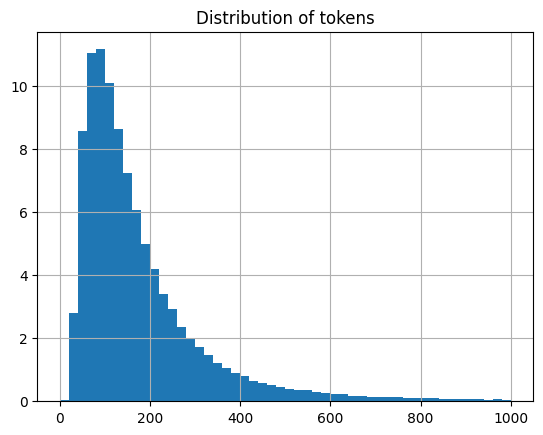

In [114]:
ax = df.tokens.hist(bins = 50, range = (0, 1000),
                   weights = 100.*np.ones_like(df.index)/df.shape[0])
ax.set_title('Distribution of tokens')

In [137]:
df_filt = df[df.tokens <= 200]

In [143]:
df_filt = df_filt[df_filt.full_text.map(lambda x: '$$' not in x)] # filter Latex
df_filt = df_filt[df_filt.full_text.map(lambda x: '$\\' not in x)] # filter Latex

In [144]:
df_filt.topic.value_counts()

topic
travel            39395
datascience       20402
movies            18707
bicycles          15557
politics          11249
astronomy         10434
economics          8854
fitness            7240
ai                 6824
chess              6260
pets               5594
bioinformatics     2886
coffee             1246
genai               118
Name: count, dtype: int64

In [154]:
df_filt[df_filt.topic == 'genai'][['full_text']].sample(5, random_state=42)

,full_text
282,"How to generate exact word(s) in generated image?\nI want to design a prompt where I already have the main thing in the image fixed, but I need to have a text included in the image with exact word(s) I put in there. For example, this is my prompt.\n\na flying bird, text ""Bird"" in the background\n\nThe result only generates a flying bird. No text in the image, let alone the exact word.\nHow to generate exact word(s) in generated image?\nI am using this tool.\n"
395,"What is the meaning of the prompt ""derpibooru_p_95"", and what effect does it achieve?\nWhen crafting a prompt for a generative AI image package - For example using Stable diffusion with the Automatic111 web ui - what is the meaning of the prompt fragment ""derpibooru_p_95"", and what effect does adding it to your prompt achieve?\n"
17,"How do I ""teach"" a large language model new knowledge?\nSuppose I have a copy of a pre-trained transformer-based large language model like Google's T5 or Meta's Llama. Due to the pre-training, it contains a lot of knowledge.\nHowever, I want to teach the model something new, knowledge it doesn't already contain about a specific domain. That way, when I ask it to do a task or answer a question about this domain, it can benefit from this specialized knowledge?\nHow would I go about teaching a pre-trained large language model new knowledge?\n"
220,"Generative AI Use Case for Search Domain\nI am trying to think and research for use cases that can beneficial search experience using Generative AI. There are two things,\n\nThe final search results that can be more relevant and personalised per user. This would take time and more effort - in terms the backend search service to change/upgrade etc.\nThe more I am trying to focus how can generative ai be leveraged and provide to benefits on the client side while user is actually search. One thought I had:\nused to generate new keywords and topics that can be used to improve the search engine's coverage of a particular topic. This can help to provide more relevant results to users.\n\nI wanted to understand what other use case have you witnessed/seem where generative ai can really helpful while user is actually searching (on the client side experience)\n"
113,"How can I encourage ChatGPT to be more ""disagreeable"" or firm on a point it's made, instead of backing off when told it's wrong?\nAs mentioned in Why is ChatGPT so quick to apologize when ""corrected"" instead of disagreeing or engaging in ""argument"" or ""debate"" with the user?:\n\nWhen you tell ChatGPT it's wrong about something, it will often very quickly apologize and say it's made an error (even if it's very clearly right), perhaps point to its knowledge cutoff date, and then agree with the user.\n\nHow can I make ChatGPT be more firm on its points/arguments, instead of being so quick to apologize and admit fault?\nUnlike How to get ChatGPT to Stop Apologizing?, this question is about how to make ChatGPT more firm on what it says instead of just not apologizing, and is not specifically about apology cases.\n"


In [165]:
tmp_dfs = []

for topic in df_filt.topic.unique():
    sample_tmp_df = df_filt[df_filt.topic == topic][['full_text', 'topic', 'tokens']].sample(100, random_state=42)
    tmp_dfs.append(sample_tmp_df)

In [166]:
sample_df = pd.concat(tmp_dfs)

In [167]:
sample_df.tokens.sum()

150262

Text(0.5, 1.0, 'Distribution of tokens in the sample')

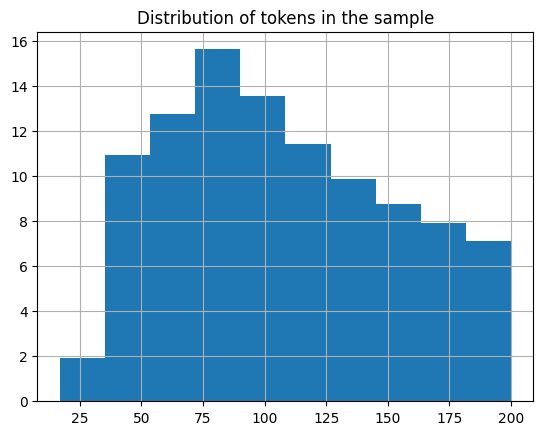

In [168]:
ax = sample_df.tokens.hist(bins = 10,
                   weights = 100.*np.ones_like(sample_df.index)/sample_df.shape[0])
ax.set_title('Distribution of tokens in the sample')

In [169]:
sample_df.to_csv('sample_stack_exchange_data.csv', index = False, sep = '\t')